### Goals

1. Implement a random forest classifier to predict which customers are likely to buy a bank's personal investment plan.

2. Extract significant association rules from a bank's customers information to help the bank have a deeper look at its customers and be more effective in future marketing campaigns.

#### About

| Features  | Description  |
| --- | --- |
| age | age of customer in years (numeric) |
| sex | MALE / FEMALE |
| region | inner_city/rural/suburban/town |
| income | income of customer (numeric) |
| married | is the customer married (YES/NO) | 
| children | number of children (numeric)|
| car  | does the customer own a car (YES/NO) |
| save_acct | does the customer have a saving account (YES/NO) |
| current_acct | does the customer have a current account (YES/NO) |
| mortgage | does the customer have a mortgage (YES/NO) |
| pip | did the customer buy a personal investment plan after the last mailing (YES/NO) |

`pip` is the target.

### Import the necessary modules and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Data Collection

In [2]:
bank = pd.read_csv("bank.csv", index_col=0)
bank.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pip
id,,,,,,,,,,,
ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


### Explore the data

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, ID12101 to ID12700
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    int64  
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pip          600 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 56.2+ KB


In [4]:
df = bank.copy()
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pip
id,,,,,,,,,,,
ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES


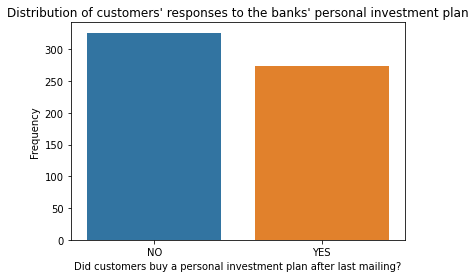

In [5]:
pip_counts = df['pip'].value_counts()
sns.barplot(x=pip_counts.index, y=pip_counts)
plt.title("Distribution of customers' responses to the banks' personal investment plan")
plt.xlabel('Did customers buy a personal investment plan after last mailing?')
plt.ylabel('Frequency')
plt.show()

The classes are not balanced where the data contains more customers who didn't buy an investment plan after the last mailing.

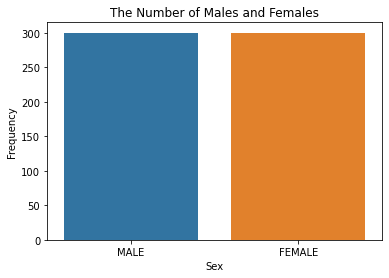

In [6]:
sex_counts = df['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts)
plt.title("The Number of Males and Females")
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

The number of males and females in the dataset is equal.

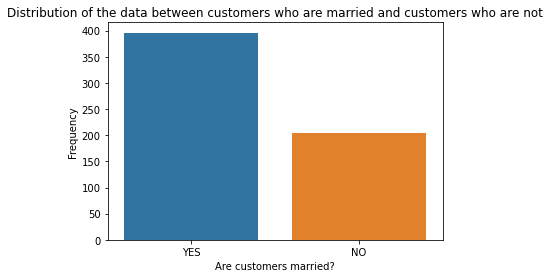

In [7]:
married_counts = df['married'].value_counts()
sns.barplot(x=married_counts.index, y=married_counts)
plt.title('Distribution of the data between customers who are married and customers who are not')
plt.xlabel('Are customers married?')
plt.ylabel('Frequency')
plt.show()

Most of the customers are married.

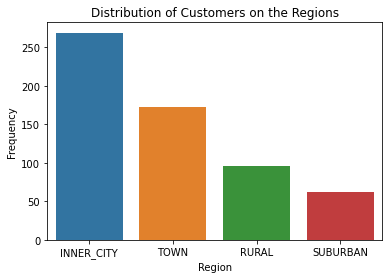

In [8]:
region_counts = df['region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts)
plt.title("Distribution of Customers on the Regions")
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

Most customers live in the inner city.

#### Encode Features

Features' values should be numeric in order to be compatible with machine learning algorithms.

1. Encode categorical features

In [9]:
encoder = LabelEncoder()
cols = ['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage']
df[cols] = df[cols].apply(encoder.fit_transform)

2. Encode Label

In [10]:
binarizer = LabelBinarizer()
df['pip'] = binarizer.fit_transform(df['pip'])
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pip
id,,,,,,,,,,,
ID12101,48,0,0,17546.00,0,1,0,0,0,0,1
ID12102,40,1,3,30085.10,1,3,1,0,1,1,0
ID12103,51,0,0,16575.40,1,0,1,1,1,0,0
ID12104,23,0,3,20375.40,1,3,0,0,1,0,0
ID12105,57,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
ID12696,61,0,0,47025.00,0,2,1,1,1,1,0
ID12697,30,0,0,9672.25,1,0,1,1,1,0,0
ID12698,31,0,3,15976.30,1,0,1,1,0,0,1


#### Split Data

In [11]:
X = df.drop('pip', axis=1)
y = df['pip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train a Random Forest classifier

In [12]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

print('Accuracy of decision tree on training set: {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of decision tree on test set: {:.2f}'.format(clf.score(X_test,y_test)))

              precision    recall  f1-score   support

          No       0.89      0.83      0.86        66
         Yes       0.81      0.87      0.84        54

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120

Accuracy of decision tree on training set: 1.00
Accuracy of decision tree on test set: 0.85


#### Model's parameter tuning

In [13]:
rf = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [50, 100, 200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

models = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
models.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 400]})

#### Selecting and testing the optimal classifier

In [14]:
optimal_clf = models.best_estimator_
optimal_clf

RandomForestClassifier(n_estimators=400, random_state=0)

In [15]:
y_pred = optimal_clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

print('Accuracy of decision tree on training set: {:.2f}'.format(optimal_clf.score(X_train,y_train)))
print('Accuracy of decision tree on test set: {:.2f}'.format(optimal_clf.score(X_test,y_test)))

              precision    recall  f1-score   support

          No       0.89      0.83      0.86        66
         Yes       0.81      0.87      0.84        54

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120

Accuracy of decision tree on training set: 1.00
Accuracy of decision tree on test set: 0.85


Therefore, a random forest classifier was created which achieves 85% accuracy on the test set. Accuracy is not a trusted measure in this case because the classes are not balanced but even f1-score is high so the model is good.

### Mining Association Rules

#### Data Types Needed

Apriori algorithm needed for association rule mining requires categorical data preferably binary data not numeric values since it is based on counting so it doesn't make sense to count the occurances of continuous and ratio types of data because this will make all the data tuples kind of distinct e.g. 'income' attribute may have different values for each instance so the count of each will be 1 which leads to an absolute support of 1 for each distinct value and as a result no co-occurances will be observed which makes this attribute irrelavent despite that it is extremely important in such case.

Therefore, attributes containing such types of data have to be split into bins.

#### Binning

Inorder to know the number of bins necessary to split the data in accordance for each attribute, further exploration have to be considered like having a look at the statistical description of the data like the <b>measures of central tendency</b> and <b>dispersion</b>.

In [16]:
bank[['age', 'income', 'children']].describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


According to the statistical description of the attributes:

<u><i>age</i></u> ranges between 18 and 67 where these values are about 24/25 years far from the mean which suggests that the data are uniformly distributed along the attribute.

Therefore, <u><i>age</i></u> can be split into 3 bins: young, mid, old.

In [17]:
bins = np.linspace(start=bank['age'].min(), stop=bank['age'].max(), num=4, endpoint=True)
bin_labels = ['young', 'mid-aged', 'old']
bank['age'] = pd.cut(bank['age'], bins=bins, labels=bin_labels, include_lowest=True)
bank['age']

id
ID12101    mid-aged
ID12102    mid-aged
ID12103         old
ID12104       young
ID12105         old
             ...   
ID12696         old
ID12697       young
ID12698       young
ID12699       young
ID12700    mid-aged
Name: age, Length: 600, dtype: category
Categories (3, object): ['young' < 'mid-aged' < 'old']

<u><i>income</i></u> is kind of tricky and needs to be visualized to understand more about its distribution because it looks like most values(75%) < `36,173$`while the rest ranges to `63,130.1$`.

Text(0, 0.5, 'counts')

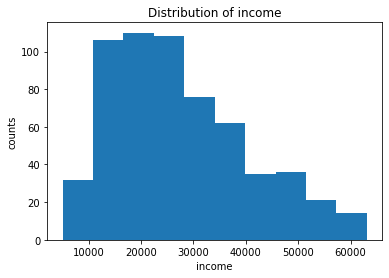

In [18]:
plt.hist(bank['income'])
plt.title('Distribution of income')
plt.xlabel('income')
plt.ylabel('counts')

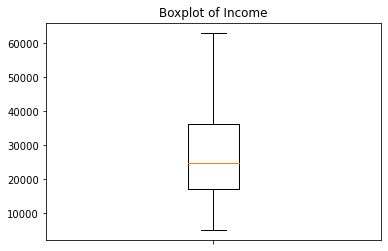

In [19]:
plt.boxplot(x=bank['income'], labels=[''])
plt.title('Boxplot of Income')
plt.show()

According to the plots, and after experimenting various number of bins, the number of bins that suits the 'income' attribute is 5 because it is the best possible choice to group the similar data together without losing their identity.

In [20]:
bins = np.linspace(start=bank['income'].min(), stop=bank['income'].max(), num=6)
bin_labels = ['very low', 'low','mid', 'high', 'very high']
bank['income'] = pd.cut(x=bank['income'], bins=bins, labels=bin_labels, include_lowest=True)
bank['income']

id
ID12101         low
ID12102         mid
ID12103    very low
ID12104         low
ID12105        high
             ...   
ID12696        high
ID12697    very low
ID12698    very low
ID12699    very low
ID12700         low
Name: income, Length: 600, dtype: category
Categories (5, object): ['very low' < 'low' < 'mid' < 'high' < 'very high']

<u><i>children</i></u>

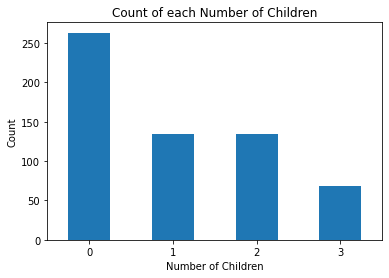

In [21]:
bank.groupby('children').count()['age'].plot(kind='bar', rot=0)
plt.title('Count of each Number of Children')
plt.ylabel('Count')
plt.xlabel('Number of Children')
plt.show()

According to the histogram and the statistical description of the attribute <u><i>children</i></u>, since the values are distributed across the attribut with a mean of 1, and the most occuring values are for less number of children, then we can consider 2 bins, first: 0 and 1 children, second: 2 and 3 children. Besides, since there exists only 4 choices, we could keep them without binning which looks even better because by this way we won't lose the identity of the data and the number of attributes won't be much bigger.

#### One-hot encoding

It is a technique used to convert multi-valued features to binary features.

#### TransactionEncoder (makes one hot encoding) takes a list of lists as input

Hence, a list of lists containing customer information will be generated. But some features already have only two unique values (yes/no), so transaction encoder will only be executed on the features containing more than three unique values.

##### Find non-binary features

In [22]:
count_unique_values = bank.apply(lambda x: len(pd.unique(x)))  # count unique values of each feature
non_binary = count_unique_values[count_unique_values > 2]  # filter the features having more than 2 unique values
non_binary_frame = bank[non_binary.index]  # only select the non_binary features from the bank df
non_binary_frame.head()

,age,region,income,children
id,,,,
ID12101,mid-aged,INNER_CITY,low,1
ID12102,mid-aged,TOWN,mid,3
ID12103,old,INNER_CITY,very low,0
ID12104,young,TOWN,low,3
ID12105,old,RURAL,high,0


Make the list of lists containing the non-binary features.

For each value, the column name will be appended to it in order to know each value from which column came.

In [23]:
values = []

for i in range(len(non_binary_frame)):
    values.append([str(non_binary_frame.values[i,j]) + '_' + col_name for j, col_name in enumerate(non_binary_frame.columns)])
    
values

[['mid-aged_age', 'INNER_CITY_region', 'low_income', '1_children'],
 ['mid-aged_age', 'TOWN_region', 'mid_income', '3_children'],
 ['old_age', 'INNER_CITY_region', 'very low_income', '0_children'],
 ['young_age', 'TOWN_region', 'low_income', '3_children'],
 ['old_age', 'RURAL_region', 'high_income', '0_children'],
 ['old_age', 'TOWN_region', 'mid_income', '2_children'],
 ['young_age', 'RURAL_region', 'very low_income', '0_children'],
 ['old_age', 'TOWN_region', 'low_income', '0_children'],
 ['mid-aged_age', 'SUBURBAN_region', 'low_income', '2_children'],
 ['old_age', 'TOWN_region', 'low_income', '2_children'],
 ['old_age', 'TOWN_region', 'very high_income', '0_children'],
 ['old_age', 'INNER_CITY_region', 'low_income', '0_children'],
 ['mid-aged_age', 'TOWN_region', 'very low_income', '1_children'],
 ['old_age', 'TOWN_region', 'very high_income', '1_children'],
 ['mid-aged_age', 'RURAL_region', 'low_income', '0_children'],
 ['mid-aged_age', 'INNER_CITY_region', 'low_income', '0_childre

#### One-hot Encoding

In [24]:
encoder = TransactionEncoder().fit(values)
one_hot = encoder.transform(values)
one_hot = pd.DataFrame(one_hot, columns=encoder.columns_, index=bank.index)
one_hot

,0_children,1_children,2_children,3_children,INNER_CITY_region,RURAL_region,SUBURBAN_region,TOWN_region,high_income,low_income,mid-aged_age,mid_income,old_age,very high_income,very low_income,young_age
id,,,,,,,,,,,,,,,,
ID12101,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False
ID12102,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False
ID12103,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False
ID12104,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True
ID12105,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12696,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
ID12697,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
ID12698,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True


#### Encode the Binary Features

In [25]:
binary_frame = bank.drop(columns=non_binary.index)

binary_frame

,sex,married,car,save_act,current_act,mortgage,pip
id,,,,,,,
ID12101,FEMALE,NO,NO,NO,NO,NO,YES
ID12102,MALE,YES,YES,NO,YES,YES,NO
ID12103,FEMALE,YES,YES,YES,YES,NO,NO
ID12104,FEMALE,YES,NO,NO,YES,NO,NO
ID12105,FEMALE,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...
ID12696,FEMALE,NO,YES,YES,YES,YES,NO
ID12697,FEMALE,YES,YES,YES,YES,NO,NO
ID12698,FEMALE,YES,YES,YES,NO,NO,YES


In [26]:
binary_df = pd.concat([one_hot, binary_frame], axis=1)

encoder = LabelEncoder()
encoded_frame = binary_df.apply(encoder.fit_transform)
encoded_frame

,0_children,1_children,2_children,3_children,INNER_CITY_region,RURAL_region,SUBURBAN_region,TOWN_region,high_income,low_income,...,very high_income,very low_income,young_age,sex,married,car,save_act,current_act,mortgage,pip
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
ID12102,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,1,1,0,1,1,0
ID12103,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,1,1,0,0
ID12104,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
ID12105,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12696,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
ID12697,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0
ID12698,1,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,1,1,0,0,1


Finally the data are ready to find the frequent itemsets.

### Apriori

Generate the frequent itemsets

I'll consider a minimum support of 0.03 which seems reasonable and in order to get many rules having pip as consequents.

In [27]:
frequent_itemsets = apriori(encoded_frame, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.438333,(0_children)
1,0.225000,(1_children)
2,0.223333,(2_children)
3,0.113333,(3_children)
4,0.448333,(INNER_CITY_region)
...,...,...
2256,0.031667,"(current_act, car, married, save_act, sex, low..."
2257,0.033333,"(mid-aged_age, current_act, car, married, save..."
2258,0.033333,"(current_act, old_age, car, married, save_act,..."
2259,0.033333,"(current_act, old_age, car, pip, save_act, mar..."


### Mine the association rules

Rules that satisfy a minimum support threshold and a minimum confidence threshold are considered `strong rules`, but that doesn't mean they are interesting.

`support` is the percentage of transactions that contains the itemset

`confidence` is the percentage that the consequent itemset(B) occurs given that the antecedant itemset(A) occured.

`lift` is another evaluation metric that tells to which extent are the antecedents and consequents correlated. If lift > 1 then there is positive correlation(dependence) between the two itemsets and it gets higher as their dependence increase.

In [28]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.75).sort_values(by=['lift', 'confidence','support'], ascending=False)
rules.reset_index(drop=True, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(very high_income, car)","(save_act, pip, old_age)",0.033333,0.135000,0.031667,0.950000,7.037037,0.027167,17.300000
1,(very high_income),"(save_act, pip, old_age)",0.058333,0.135000,0.050000,0.857143,6.349206,0.042125,6.055000
2,"(very high_income, current_act)","(save_act, pip, old_age)",0.050000,0.135000,0.041667,0.833333,6.172840,0.034917,5.190000
3,"(very high_income, car)","(pip, old_age)",0.033333,0.180000,0.031667,0.950000,5.277778,0.025667,16.400000
4,"(very high_income, save_act, car)","(pip, old_age)",0.033333,0.180000,0.031667,0.950000,5.277778,0.025667,16.400000
...,...,...,...,...,...,...,...,...,...
1250,"(save_act, married, INNER_CITY_region, 2_child...",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667
1251,"(save_act, married, INNER_CITY_region, mid_inc...",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667
1252,"(mortgage, married, car, mid-aged_age)",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667
1253,"(save_act, sex, car, mid_income)",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667


I used a min confidence threshold of 0.75 which means that there is 75% chance that the antecedents implies the consequents.

According to the business objective of the bank, the most interesting rules are the ones having 'pip' as a consequent because understanding the factors that affects the probability of responding positively to an offer will help improve future plans.

We would prefer the actecedents' itemsets to be maximal in order to get the most benefit.

In [29]:
rules['length'] = rules['antecedents'].map(lambda x:len(x))  # add a column having the length of each antecedent
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(very high_income, car)","(save_act, pip, old_age)",0.033333,0.135000,0.031667,0.950000,7.037037,0.027167,17.300000,2
1,(very high_income),"(save_act, pip, old_age)",0.058333,0.135000,0.050000,0.857143,6.349206,0.042125,6.055000,1
2,"(very high_income, current_act)","(save_act, pip, old_age)",0.050000,0.135000,0.041667,0.833333,6.172840,0.034917,5.190000,2
3,"(very high_income, car)","(pip, old_age)",0.033333,0.180000,0.031667,0.950000,5.277778,0.025667,16.400000,2
4,"(very high_income, save_act, car)","(pip, old_age)",0.033333,0.180000,0.031667,0.950000,5.277778,0.025667,16.400000,3
...,...,...,...,...,...,...,...,...,...,...
1250,"(save_act, married, INNER_CITY_region, 2_child...",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667,4
1251,"(save_act, married, INNER_CITY_region, mid_inc...",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667,4
1252,"(mortgage, married, car, mid-aged_age)",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667,4
1253,"(save_act, sex, car, mid_income)",(current_act),0.040000,0.758333,0.030000,0.750000,0.989011,-0.000333,0.966667,4


#### Getting the maximal itemsets that implies 'pip'

antecedents => {'pip'}

In [30]:
pip_cons = rules[rules['consequents'] == {'pip'}]
longest_antecedent = pip_cons.length == pip_cons.length.max()
pip_cons = pip_cons[longest_antecedent].reset_index(drop=True)
pip_cons

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(current_act, 1_children, save_act, married, l...",(pip),0.030000,0.456667,0.030000,1.000000,2.189781,0.016300,inf,5
1,"(mid-aged_age, current_act, 1_children, save_a...",(pip),0.030000,0.456667,0.030000,1.000000,2.189781,0.016300,inf,5
2,"(current_act, 1_children, married, save_act, sex)",(pip),0.041667,0.456667,0.038333,0.920000,2.014599,0.019306,6.791667,5
3,"(1_children, old_age, car, save_act, married)",(pip),0.033333,0.456667,0.030000,0.900000,1.970803,0.014778,5.433333,5
4,"(current_act, 1_children, car, save_act, sex)",(pip),0.033333,0.456667,0.030000,0.900000,1.970803,0.014778,5.433333,5
5,"(current_act, 1_children, car, save_act, married)",(pip),0.048333,0.456667,0.043333,0.896552,1.963252,0.021261,5.252222,5


#### Below are the most interesting rules.

In [31]:
for i in range(len(pip_cons)):
    print(str(pip_cons['antecedents'].values[i]).ljust(84) + '=>'.ljust(10) + "{'pip'}")
    print('-' * 101)

frozenset({'current_act', '1_children', 'save_act', 'married', 'low_income'})       =>        {'pip'}
-----------------------------------------------------------------------------------------------------
frozenset({'mid-aged_age', 'current_act', '1_children', 'save_act', 'married'})     =>        {'pip'}
-----------------------------------------------------------------------------------------------------
frozenset({'current_act', '1_children', 'married', 'save_act', 'sex'})              =>        {'pip'}
-----------------------------------------------------------------------------------------------------
frozenset({'1_children', 'old_age', 'car', 'save_act', 'married'})                  =>        {'pip'}
-----------------------------------------------------------------------------------------------------
frozenset({'current_act', '1_children', 'car', 'save_act', 'sex'})                  =>        {'pip'}
----------------------------------------------------------------------------------

These rules are strong since they satisfy both a min support and min confidence, besides they have a high lift which suggests that the itemsets are positively correlated with 'pip', and from a business point of view, the bank can use these rules to target people having such conditions knowing that there is high chance they will respond positivily.